In [1]:
import LancasterAQ as laq
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import osmnx as ox
import numpy as np
import networkx as nx
sns.set_theme(context='paper', style='whitegrid',font='serif',)

In the package a number of data types are available:
- a pandas table
- a numpy object
- a networkx graph
- a geojson

### Pandas

In [2]:
df = laq.TabularObject().to_pandas()
df.head()

,System Time,lat,lon,ultrafines,transport_mode,log_ultrafines,trip_index
0,2022-05-05 15:53:08,54.008605,-2.788483,6591.0,driving,8.793612,0
1,2022-05-05 15:53:11,54.008605,-2.788483,7095.0,driving,8.867287,0
2,2022-05-05 15:53:12,54.008605,-2.788483,7505.0,driving,8.923458,0
5,2022-05-05 15:53:13,54.008605,-2.788483,7386.0,driving,8.907477,0
6,2022-05-05 15:53:16,54.008605,-2.788483,7336.0,driving,8.900685,0


To subset to time, trip type or trip number we can do the the following

In [3]:
df_trip1 = df[df['trip_index'] == 2]
df_trip1.head()

,System Time,lat,lon,ultrafines,transport_mode,log_ultrafines,trip_index
15626,2022-05-04 14:54:08,54.008697,-2.788345,17913.0,driving,9.793338,2
15627,2022-05-04 14:54:09,54.008697,-2.788347,17193.0,driving,9.752316,2
15628,2022-05-04 14:54:12,54.008697,-2.788347,18820.0,driving,9.842729,2
15631,2022-05-04 14:54:13,54.008697,-2.788347,18622.0,driving,9.832153,2
15632,2022-05-04 14:54:15,54.008697,-2.788347,18564.0,driving,9.829033,2


In [4]:
df_cycling = df[df['transport_mode'] == 'cycling']
df_cycling.head()

,System Time,lat,lon,ultrafines,transport_mode,log_ultrafines,trip_index
11132,2022-05-05 15:50:08,54.008753,-2.788255,4235.0,cycling,8.351375,1
11133,2022-05-05 15:50:09,54.008750,-2.788250,4132.0,cycling,8.326759,1
11134,2022-05-05 15:50:10,54.008745,-2.788247,4289.0,cycling,8.364042,1
11135,2022-05-05 15:50:11,54.008745,-2.788247,4026.0,cycling,8.300777,1
11136,2022-05-05 15:50:13,54.008747,-2.788247,3823.0,cycling,8.249052,1


In [5]:
df_time_slice = df[(df['System Time'] >= '2022-05-05 15:50:08') & (df['System Time'] <= '2022-05-05 15:50:18')]
df_time_slice.head()

,System Time,lat,lon,ultrafines,transport_mode,log_ultrafines,trip_index
11132,2022-05-05 15:50:08,54.008753,-2.788255,4235.0,cycling,8.351375,1
11133,2022-05-05 15:50:09,54.008750,-2.788250,4132.0,cycling,8.326759,1
11134,2022-05-05 15:50:10,54.008745,-2.788247,4289.0,cycling,8.364042,1
11135,2022-05-05 15:50:11,54.008745,-2.788247,4026.0,cycling,8.300777,1
11136,2022-05-05 15:50:13,54.008747,-2.788247,3823.0,cycling,8.249052,1


Basic plotting with pandas is straightforward

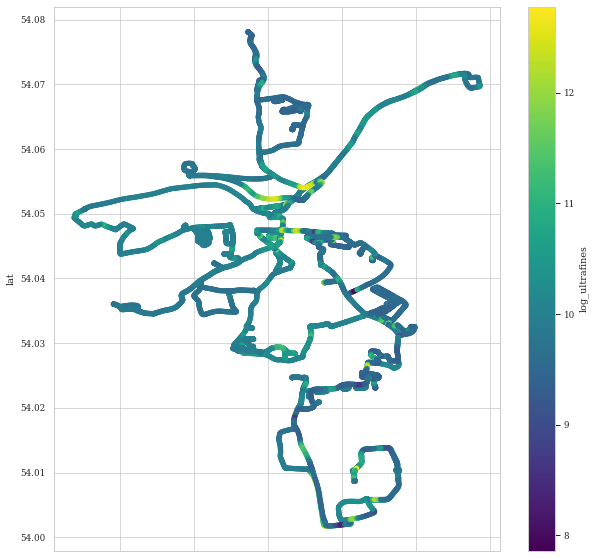

In [6]:
df_trip1[['lat', 'lon', 'log_ultrafines']].plot(x='lon', y='lat', c='log_ultrafines', kind='scatter', cmap='viridis', figsize=(10, 10))
plt.show()

### Geopandas

Notice how the lat and lon has been projected to a UTM coordinate reference system under the geometry, which aids interoperability with networkx and osmnx

In [7]:
gdf = laq.TabularObject().to_geopandas()
gdf.head()

,System Time,lat,lon,ultrafines,transport_mode,log_ultrafines,trip_index,geometry
0,2022-05-05 15:53:08,54.008605,-2.788483,6591.0,driving,8.793612,0,POINT (513861.952 5984499.762)
1,2022-05-05 15:53:11,54.008605,-2.788483,7095.0,driving,8.867287,0,POINT (513861.952 5984499.762)
2,2022-05-05 15:53:12,54.008605,-2.788483,7505.0,driving,8.923458,0,POINT (513861.952 5984499.762)
5,2022-05-05 15:53:13,54.008605,-2.788483,7386.0,driving,8.907477,0,POINT (513861.952 5984499.762)
6,2022-05-05 15:53:16,54.008605,-2.788483,7336.0,driving,8.900685,0,POINT (513861.952 5984499.762)


We can also load the road meta data sourced from open street map

In [8]:
gdf = laq.TabularObject().to_geopandas_with_metadata()
gdf.head()

/home/amosm1/LancasterAQ/src/LancasterAQ/data/data_object.py:75: UserWarning: Using pre-cached geodataframe with metadata
  warnings.warn("Using pre-cached geodataframe with metadata")


,System Time,lat,lon,ultrafines,transport_mode,log_ultrafines,trip_index,geometry,osmid,oneway,...,reversed,length,name,service,junction,ref,bridge,access,width,tunnel
0,2022-05-05 15:53:08,54.008605,-2.788483,6591.0,driving,8.793612,0,"LINESTRING (513867.390 5984472.363, 513865.765...",989392,False,...,True,39.481,South Drive,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-05-05 15:53:11,54.008605,-2.788483,7095.0,driving,8.867287,0,"LINESTRING (513867.390 5984472.363, 513865.765...",989392,False,...,True,39.481,South Drive,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-05-05 15:53:12,54.008605,-2.788483,7505.0,driving,8.923458,0,"LINESTRING (513867.390 5984472.363, 513865.765...",989392,False,...,True,39.481,South Drive,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2022-05-05 15:53:13,54.008605,-2.788483,7386.0,driving,8.907477,0,"LINESTRING (513867.390 5984472.363, 513865.765...",989392,False,...,True,39.481,South Drive,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2022-05-05 15:53:16,54.008605,-2.788483,7336.0,driving,8.900685,0,"LINESTRING (513867.390 5984472.363, 513865.765...",989392,False,...,True,39.481,South Drive,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here we can look at a summary of the metadata of road type.

In [9]:
gdf['highway'].value_counts()

residential                           23767
tertiary                              19608
primary                               19130
unclassified                          11843
cycleway                               9501
service                                7973
footway                                5035
motorway                               1636
primary_link                            667
secondary                               550
[service, cycleway]                     476
pedestrian                              441
motorway_link                           389
[residential, cycleway]                 348
[residential, footway]                  317
[footway, steps]                        238
[service, footway]                      154
[cycleway, tertiary]                    140
trunk_link                              127
[unclassified, cycleway]                 94
path                                     93
[service, residential]                   91
[unclassified, footway]         

In [10]:
%load_ext watermark
%watermark -n -u -v -iv -w 

Last updated: Wed Oct 12 2022

Python implementation: CPython
Python version       : 3.10.5
IPython version      : 8.4.0

matplotlib : 3.5.2
LancasterAQ: 1.0.0
osmnx      : 1.2.1
pandas     : 1.4.3
sys        : 3.10.5 | packaged by conda-forge | (main, Jun 14 2022, 07:06:46) [GCC 10.3.0]
numpy      : 1.22.3
networkx   : 2.8.4
seaborn    : 0.11.2

Watermark: 2.3.1

